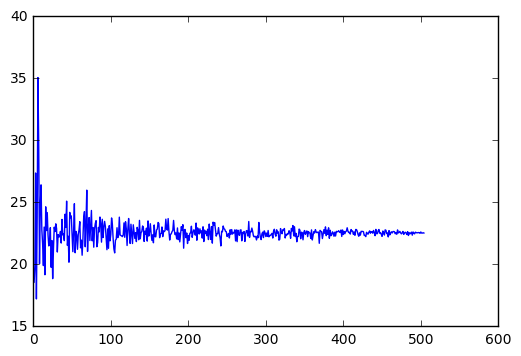

In [14]:
import numpy as np
import random

plt.plot([np.mean(random.sample(list(boston['target']), i)) for i in range(1, len(boston['target']))])

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

(array([  21.,   55.,   82.,  154.,   84.,   41.,   30.,    8.,   10.,   21.]),
 array([  5. ,   9.5,  14. ,  18.5,  23. ,  27.5,  32. ,  36.5,  41. ,
         45.5,  50. ]),
 <a list of 10 Patch objects>)

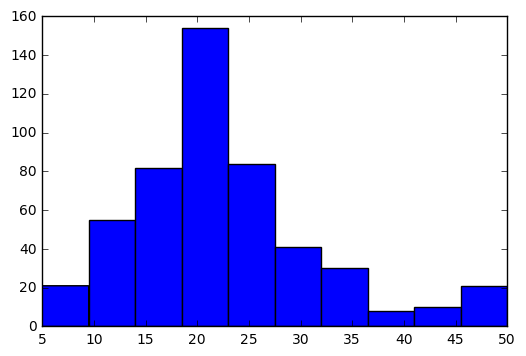

In [9]:
plt.hist(boston['target'])

In [84]:
import sklearn.cross_validation
from sklearn.datasets import load_boston
boston = load_boston()
%matplotlib inline
import matplotlib.pyplot as plt

In [25]:
mus = []

for _, idxs in sklearn.cross_validation.KFold(len(boston['target']), 5, shuffle=True):
    mus.append(np.mean(boston['target'][idxs]))
    ## 

In [28]:
np.std(mus)

0.77838497706174081

In [32]:
mus = []

for idxs, _ in sklearn.cross_validation.LeaveOneOut(len(boston['target'])):
    mus.append(np.mean(boston['target'][idxs]))

In [33]:
np.std(mus)

0.018194082267877873

In [34]:
mus

[22.529900990099009,
 22.534653465346533,
 22.50871287128713,
 22.511287128712873,
 22.505742574257429,
 22.520594059405944,
 22.532079207920795,
 22.523762376237624,
 22.544752475247524,
 22.540000000000003,
 22.547722772277229,
 22.540000000000003,
 22.534455445544559,
 22.537029702970298,
 22.541386138613863,
 22.538019801980198,
 22.531683168316832,
 22.542772277227723,
 22.537425742574261,
 22.541386138613863,
 22.550495049504949,
 22.538613861386139,
 22.54732673267327,
 22.548712871287126,
 22.546534653465347,
 22.549900990099012,
 22.544554455445546,
 22.548118811881185,
 22.540990099009903,
 22.535841584158412,
 22.552277227722776,
 22.54871287128713,
 22.551287128712875,
 22.55148514851485,
 22.550693069306927,
 22.540000000000003,
 22.537821782178217,
 22.535841584158412,
 22.528514851485152,
 22.516435643564353,
 22.508316831683171,
 22.524752475247524,
 22.527326732673266,
 22.528514851485152,
 22.535445544554459,
 22.539207920792077,
 22.53782178217822,
 22.54455445544554

In [37]:
np.percentile(mus, 0.005)

22.478415841584155

In [45]:
def bootstrap(data):
    return [data[random.randint(0, len(data)-1)] for _ in range(len(data))]

mus = [np.mean(bootstrap(boston['target'])) for _ in range(1000)]

(array([  10.,   41.,  114.,  196.,  287.,  203.,   92.,   37.,   17.,    3.]),
 array([ 21.3687747 ,  21.62673913,  21.88470356,  22.14266798,
         22.40063241,  22.65859684,  22.91656126,  23.17452569,
         23.43249012,  23.69045455,  23.94841897]),
 <a list of 10 Patch objects>)

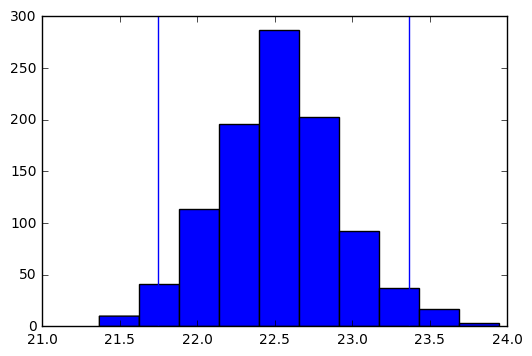

In [54]:
plt.axvline(np.percentile(mus, 2.5))
plt.axvline(np.percentile(mus, 100.0 - 2.5))
plt.hist(mus)

(array([ 1.,  4.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.]),
 array([ 0.00632 ,  0.026812,  0.047304,  0.067796,  0.088288,  0.10878 ,
         0.129272,  0.149764,  0.170256,  0.190748,  0.21124 ]),
 <a list of 10 Patch objects>)

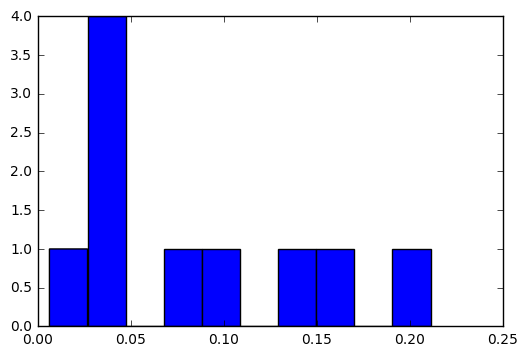

In [110]:
crim = boston['data'][:,0][:10]
plt.hist(crim)

In [111]:
target = np.array(boston['target'][:10])

diffs = []
for _ in range(10000):
    random.shuffle(target)
    diffs.append(np.mean(target[crim < np.median(crim)]) - np.mean(target[crim >= np.median(crim)]))

In [113]:
target = boston['target'][:10]
real_diff = np.mean(target[crim < np.median(crim)]) - np.mean(target[crim >= np.median(crim)])
print(real_diff)

4.16


(array([  169.,   408.,   963.,  1525.,  1918.,  1935.,  1503.,   985.,
          404.,   190.]),
 array([-11.24 ,  -8.992,  -6.744,  -4.496,  -2.248,   0.   ,   2.248,
          4.496,   6.744,   8.992,  11.24 ]),
 <a list of 10 Patch objects>)

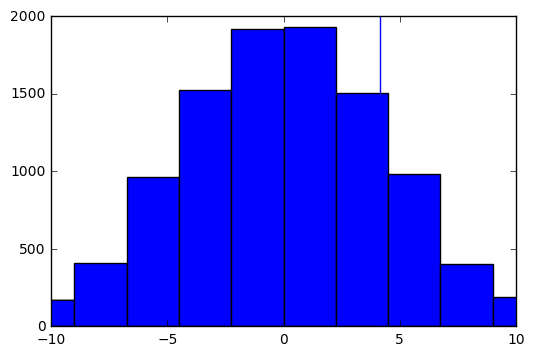

In [114]:
plt.axvline(real_diff)
plt.xlim(-10, 10)
plt.hist(diffs)

In [115]:
diffs = np.array(diffs)

len(diffs[diffs > real_diff])/len(diffs)

0.1758